<a href="https://colab.research.google.com/github/Sean-1005/JSC270_Assg2/blob/JSC270A2/Copy_of_JSC270_Assignment2_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas.util.testing as tm

###Importing data

In [11]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']
income94


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
income94 = income94.replace(" ?", np.NaN)
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


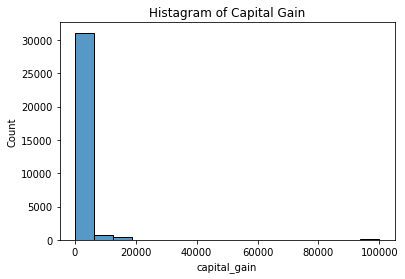

In [ ]:
sns.histplot(x = 'capital_gain', data = income94)
plt.xlabel('capital_gain')
plt.title('Histagram of Capital Gain')
plt.show()

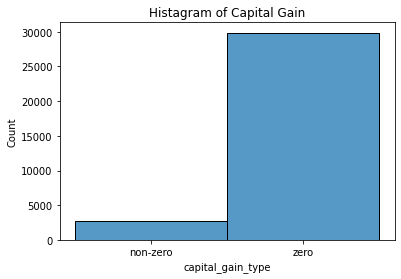

In [ ]:
conditions = [
              (income94['capital_gain'] == 0),
              (income94['capital_gain'] > 0), 
]
values = ["zero", "non-zero"]

income94['capital_gain_type'] = np.select(conditions, values)

sns.histplot(x = 'capital_gain_type', data = income94)
plt.xlabel('capital_gain_type')
plt.title('Histagram of Capital Gain')
plt.show()

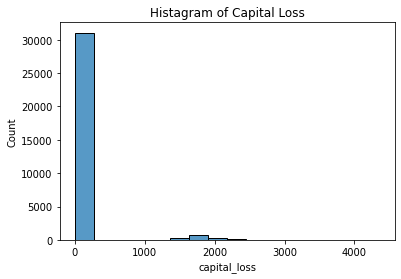

In [ ]:
income94.capital_gain.value_counts()
sns.histplot(x = 'capital_loss', data = income94)
plt.xlabel('capital_loss')
plt.title('Histagram of Capital Loss')
plt.show()

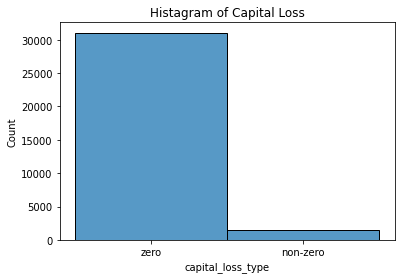

In [ ]:
# Plot after transform.
conditions = [
              (income94['capital_loss'] == 0),
              (income94['capital_loss'] > 0), 
]
values = ["zero", "non-zero"]

income94['capital_loss_type'] = np.select(conditions, values)

sns.histplot(x = 'capital_loss_type', data = income94)
plt.xlabel('capital_loss_type')
plt.title('Histagram of Capital Loss')
plt.show()

In [6]:
def get_outliers(num_var, df):
  '''Get outliers based on whiskers from 
  boxplot.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)
  # Generate IQR
  iqr = thirdquart - firstquart
  # Generate Whiskers
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr
  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers

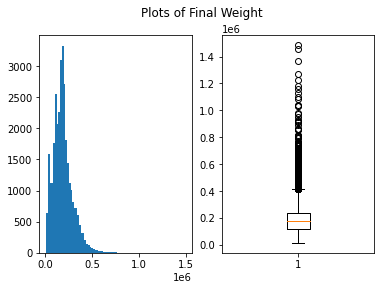

In [ ]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Plots of Final Weight')
plt1.hist(income94.fnlwgt, bins=80)
plt2.boxplot(income94.fnlwgt)
fig.show()

The variable fnlwgt has 992 outliers


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


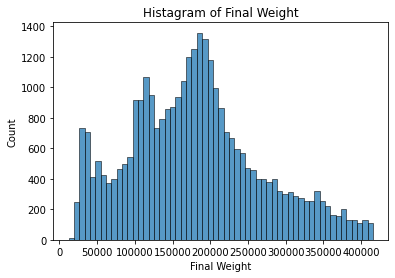

In [ ]:
# Exclude the outliers
o_income94 = income94.copy(deep=True)
outliers = get_outliers('fnlwgt', o_income94)
o_income94['fnlwgt'].loc[outliers.index] = np.NaN

sns.histplot(x = 'fnlwgt', data = o_income94)
plt.xlabel('Final Weight')
plt.title('Histagram of Final Weight')
plt.show()

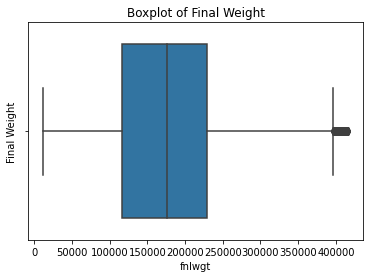

In [ ]:
sns.boxplot(x = 'fnlwgt', data = o_income94)
plt.ylabel('Final Weight')
plt.title('Boxplot of Final Weight')
plt.show()

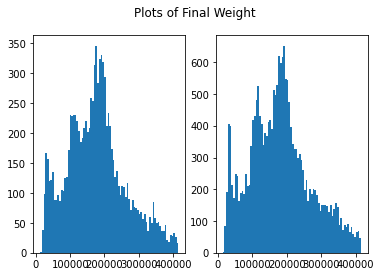

In [ ]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Plots of Final Weight')
plt1.hist(o_income94[o_income94.sex == ' Female'].fnlwgt, bins=80)
plt2.hist(o_income94[o_income94.sex == ' Male'].fnlwgt, bins = 80)
fig.show()

**Correlation**

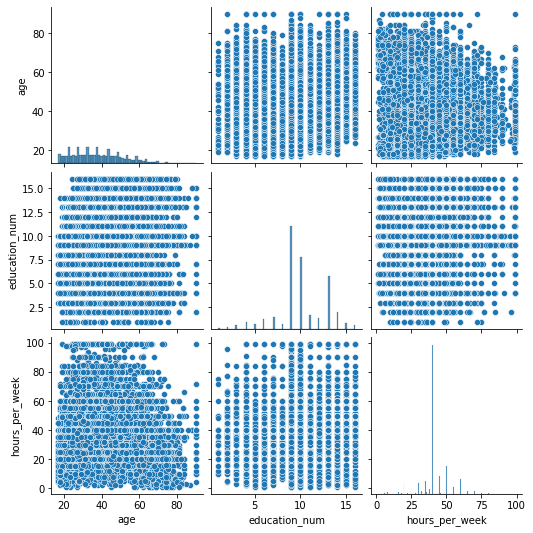

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
sns.pairplot(income94[["age", "education_num", "hours_per_week"]])
plt.show()

income94.corr()

Null Hypothesis: There is no relationship between education_num and hours_per_week. 

Alternative Hypothesis: There is some relationship between edcation_num and hours_per_week. 

In [ ]:
ttest, p_value = stats.ttest_rel(income94['fnlwgt'], income94['capital_gain'])
print(p_value)

0.0


In [ ]:
corr_f = income94[income94.sex == ' Female'][['age', 'education_num']].corr()
ttest_female, p_value = stats.ttest_rel(income94[income94.sex == ' Female']['education_num'], income94[income94.sex == ' Female']['age'])
print(p_value)
print(corr_f)

0.0
                    age  education_num
age            1.000000      -0.017899
education_num -0.017899       1.000000


In [ ]:
corr_m = income94[o_income94.sex == ' Male'][['age', 'education_num']].corr()
ttest, p_value = stats.ttest_rel(income94[income94.sex == ' Male']['education_num'], income94[income94.sex == ' Male']['age'])
print(p_value)
print(corr_m)
print(income94[o_income94.sex == ' Male']['education_num'].mean())
print(income94[o_income94.sex == ' Female']['education_num'].mean())

0.0
                    age  education_num
age            1.000000       0.060486
education_num  0.060486       1.000000
10.102891234511244
10.03574412775044


In [ ]:
# wieghted and unweighted variance for education_num
print("unweighted variance of education_num: ", income94.education_num.var())

avg_en = np.average(income94.education_num, weights=income94.fnlwgt)
var_en = np.average((income94.education_num-avg_en)**2, weights=income94.fnlwgt)
print("weighted variance of education_num: ", var_en)

print("\n")
print("unweighted variance of hours_per_week: ", income94.hours_per_week.var())

avg_hpw = np.average(income94.hours_per_week, weights=income94.fnlwgt)
var_hpw = np.average((income94.hours_per_week-avg_hpw)**2, weights=income94.fnlwgt)
print("weighted variance of education_num: ", var_hpw)

unweighted variance of education_num:  6.618889907032687
weighted variance of education_num:  6.828646539770926


unweighted variance of education_num:  152.45899505042865
weighted variance of education_num:  146.3306330028469


In [5]:
un_avg_en = np.average(income94.hours_per_week)
avg_en = np.average(income94.hours_per_week, weights=income94.fnlwgt)
print(un_avg_en, avg_en)

40.437455852092995 40.308570376806905


In [ ]:
# weigthed and unweighted covariance for education_num and hours_per_week
print("unweighted covariance between education_num and hours_per_week: ", np.cov(income94.education_num, income94.hours_per_week))
print("weighted covariance between education_num and hours_per_week: ", np.cov(income94.education_num, income94.hours_per_week, fweights=income94.fnlwgt))

unweighted covariance between education_num and hours_per_week:  [[  6.61888991   4.70533794]
 [  4.70533794 152.45899505]]
weighted covariance between education_num and hours_per_week:  [[  6.82864654   4.63388842]
 [  4.63388842 146.33063303]]


**Regression**

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:08:23   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      42.4281      0.081    521.109      

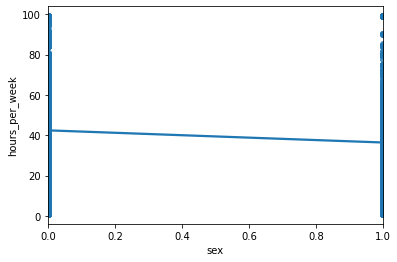

In [ ]:
reg_income94 = income94.copy()
reg_income94 = reg_income94.replace(" Male", 0)
reg_income94 = reg_income94.replace(" Female", 1)
model1 = smf.ols('hours_per_week ~ C(sex)', data = reg_income94).fit()
sns.regplot(x='sex', y='hours_per_week', data=reg_income94)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:09:52   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.3815      0.271    130.613

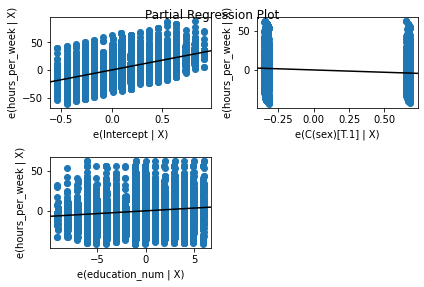

In [ ]:
model2 = smf.ols('hours_per_week ~ C(sex) + education_num', data = reg_income94).fit()
reg_plot = sm.graphics.plot_partregress_grid(model2)
fig.tight_layout(pad=2.0)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:21:31   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

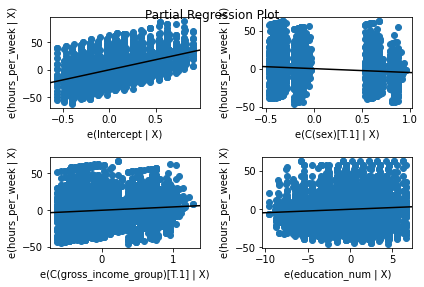

In [ ]:
reg_income94 = reg_income94.replace(" >50K", 1)
reg_income94 = reg_income94.replace(" <=50K", 0)

model3 = smf.ols('hours_per_week ~ C(sex) + education_num + C(gross_income_group)', data = reg_income94).fit()
reg_plot = sm.graphics.plot_partregress_grid(model3)
fig.tight_layout(pad=2.0)
print(model3.summary())

In [ ]:
print(model1.ssr)
print(model2.ssr)
print(model3.ssr)

4703041.014892913
4598213.607341154
4495831.606241031
